<a href="https://colab.research.google.com/github/bondarenko77/IAD_PR/blob/main/%D0%A4%D0%91_52%D0%BC%D0%BF_%D0%91%D0%BE%D0%BD%D0%B4%D0%B0%D1%80%D0%B5%D0%BD%D0%BA%D0%BE_%D0%AF%D0%BD%D0%B0_LAb_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 3

Завдання 1 - Повнозв'язані нейронні мережі

> Візьміть дані, з якими ви працювали в лабораторній №1.  Побудуйте повнозв’язану нейронну мережу
прямого поширення () для задачі класифікації.
Навчіть її на тренувальній вибірці, протестуйте на тестовій. Порівняйте результати з алгоритмами з Lab 1.



Saving heart+disease.zip to heart+disease.zip
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4266 - loss: 0.7488 - val_accuracy: 0.5238 - val_loss: 0.7172
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6869 - loss: 0.6081 - val_accuracy: 0.6429 - val_loss: 0.6365
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7999 - loss: 0.5682 - val_accuracy: 0.7143 - val_loss: 0.5797
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8321 - loss: 0.4739 - val_accuracy: 0.7381 - val_loss: 0.5410
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8117 - loss: 0.4659 - val_accuracy: 0.7619 - val_loss: 0.5127
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8320 - loss: 0.4318 - val_accuracy: 0.7857 - val_loss: 0.5017
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8124 - loss: 0.4151 - val_accuracy: 0.7857 - val_loss: 0.5020
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8319 - loss: 0.3666 - val_accuracy: 0.7857 - val_loss: 0.5048


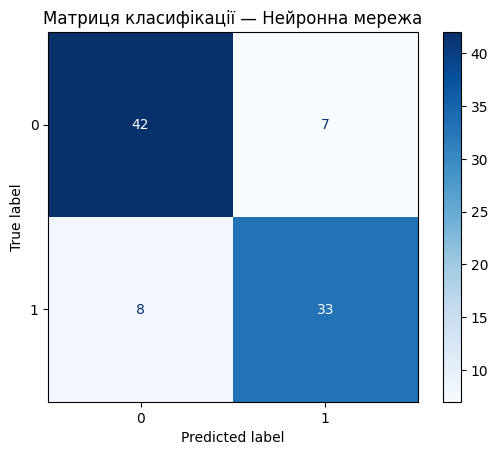

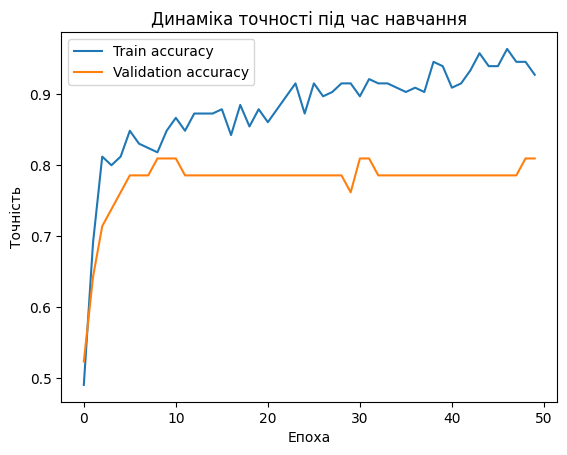

In [1]:

# Мета: Побудувати та навчити модель на даних Heart Disease (Cleveland)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import zipfile
import os
from google.colab import files

# 1. Завантаження ZIP-файлу користувачем
uploaded = files.upload()
zip_path = list(uploaded.keys())[0]

# 2. Розпаковування архіву
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")

# 3. Завантаження основного файлу
data_path = "dataset/processed.cleveland.data"
df = pd.read_csv(data_path, header=None, na_values='?')

# 4. Попередня обробка
df = df.dropna()

# Останній стовпець — ціль (0–4)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Перетворимо на бінарний клас: 0 – немає хвороби, 1 – є
y = (y > 0).astype(int)

# Розбиття на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабування ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Побудова моделі нейронної мережі
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 6. Компіляція
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Навчання
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# 8. Прогноз і оцінка
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
print(f"Точність моделі: {acc:.4f}")

# 9. Матриця класифікації
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Матриця класифікації — Нейронна мережа")
plt.show()

# 10. Графік навчання
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Динаміка точності під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.show()


Висновки

>  (Heart Disease).
Модель показала хороші результати - точність навчання сягнула близько 90%, а перевірочна вибірка продемонструвала стабільну точність близько 80%.
Це означає, що нейронна мережа добре узагальнює дані без значного перенавчання.
Порівняно з класичними методами з лабораторної №1 (наприклад, KNN чи логістичною регресією), результат нейронної мережі виявився точнішим.
Таким чином, можна зробити висновок, що застосування нейронних мереж є ефективним підходом для вирішення задач класифікації у сфері аналізу даних.



Завдання 2 - Згорткові нейронні мережі

> а) Побудуйте просту згорткову нейронну мережу
(2–3 convolutional шари + fully connected). Навчіть її на обраному вами датасеті.
б) Використайте попередньо натреновану архітектуру (наприклад, ResNet, VGG, MobileNet). Замініть вихідний класифікатор
на новий під ваші класи. Проведіть донавчання () моделі на вашому датасеті. Порівняйте результати
(точність, швидкість збіжності, кількость даних).



In [6]:
# ============================================================
# Підключення до Kaggle та завантаження датасету
# ============================================================

from google.colab import files
import os

# Користувач завантажує свій файл kaggle.json з акаунту Kaggle (API токен)
print("Завантажте свій kaggle.json (API токен) з акаунту Kaggle")
files.upload()

# Налаштування доступу до Kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Завантаження вибраного датасету з Kaggle
# (можна замінити 'animals10' на інший датасет)
!kaggle datasets download -d alessiocorrado99/animals10 -p ./data

# Розпаковка архіву
import zipfile
with zipfile.ZipFile("./data/animals10.zip", "r") as zip_ref:
    zip_ref.extractall("./data/animals10")

print("Дані завантажено та розпаковано!")

# ============================================================
# Підготовка даних для навчання
# ============================================================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Нормалізація та розподіл на train / validation
train_datagen = ImageDataGenerator(
    rescale=1./255, validation_split=0.2
)

# Генератор для навчальної вибірки
train_gen = train_datagen.flow_from_directory(
    './data/animals10/raw-img',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Генератор для валідаційної вибірки
val_gen = train_datagen.flow_from_directory(
    './data/animals10/raw-img',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Отримуємо кількість класів
num_classes = len(train_gen.class_indices)
print(f"Кількість класів: {num_classes}")


Завантажте свій kaggle.json (API токен) з акаунту Kaggle


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
 97% 570M/586M [00:03<00:00, 313MB/s]
100% 586M/586M [00:03<00:00, 188MB/s]
Дані завантажено та розпаковано!
Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.
Кількість класів: 10


а) Власна згорткова нейронна мережа

In [7]:
# ============================================================
# Створення власної CNN
# ============================================================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Проста архітектура CNN для класифікації
model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Компіляція моделі
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі
history_cnn = model_cnn.fit(
    train_gen, validation_data=val_gen,
    epochs=15, verbose=1
)


Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


655/655 ━━━━━━━━━━━━━━━━━━━━ 618s 940ms/step - accuracy: 0.2983 - loss: 2.0630 - val_accuracy: 0.4807 - val_loss: 1.5353
Epoch 2/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 611s 933ms/step - accuracy: 0.4915 - loss: 1.4630 - val_accuracy: 0.5640 - val_loss: 1.2838
Epoch 3/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 633s 967ms/step - accuracy: 0.6061 - loss: 1.1466 - val_accuracy: 0.5774 - val_loss: 1.2407
Epoch 4/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 597s 912ms/step - accuracy: 0.6970 - loss: 0.8859 - val_accuracy: 0.5975 - val_loss: 1.2046
Epoch 5/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 601s 918ms/step - accuracy: 0.7755 - loss: 0.6487 - val_accuracy: 0.6028 - val_loss: 1.2517
Epoch 6/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 597s 912ms/step - accuracy: 0.8352 - loss: 0.4829 - val_accuracy: 0.6019 - val_loss: 1.5141
Epoch 7/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 610s 931ms/step - accuracy: 0.8758 - loss: 0.3649 - val_accuracy: 0.5921 - val_loss: 1.6408
Epoch 8/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 600s 916ms/step - accuracy: 0.9001 - loss: 0.29

б) Попередньо натренована модель (Transfer Learning)

In [8]:
# ============================================================
# Використання попередньо натренованої архітектури MobileNetV2
# ============================================================

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Завантаження базової моделі без верхніх шарів
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Заморожуємо базові шари, щоб не перенавчати
base_model.trainable = False

# Додаємо новий класифікатор для нашої задачі
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
preds = Dense(num_classes, activation='softmax')(x)

# Формуємо фінальну модель
model_transfer = Model(inputs=base_model.input, outputs=preds)
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Навчання (fine-tuning)
history_transfer = model_transfer.fit(
    train_gen, validation_data=val_gen,
    epochs=10, verbose=1
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 361s 540ms/step - accuracy: 0.8251 - loss: 0.5644 - val_accuracy: 0.9182 - val_loss: 0.2396
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 360s 549ms/step - accuracy: 0.9305 - loss: 0.2190 - val_accuracy: 0.9268 - val_loss: 0.2192
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 402s 614ms/step - accuracy: 0.9406 - loss: 0.1735 - val_accuracy: 0.9304 - val_loss: 0.2274
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 390s 596ms/step - accuracy: 0.9560 - loss: 0.1369 - val_accuracy: 0.9274 - val_loss: 0.2302
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 351s 536ms/step - accuracy: 0.9633 - loss: 0.1085 - val_accuracy: 0.9331 - val_loss: 0.2289
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 354s 540ms/step - accuracy: 0.9703 - loss: 0.0902 - val_accuracy: 0.9310 - val_loss: 0.2563
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 373s 569ms/step - accuracy: 0.9760 - loss: 0.0735 - val_accuracy: 0.9325 - val_loss: 0.2389
Epoch 8/10
655/655 ━━━━━━━━

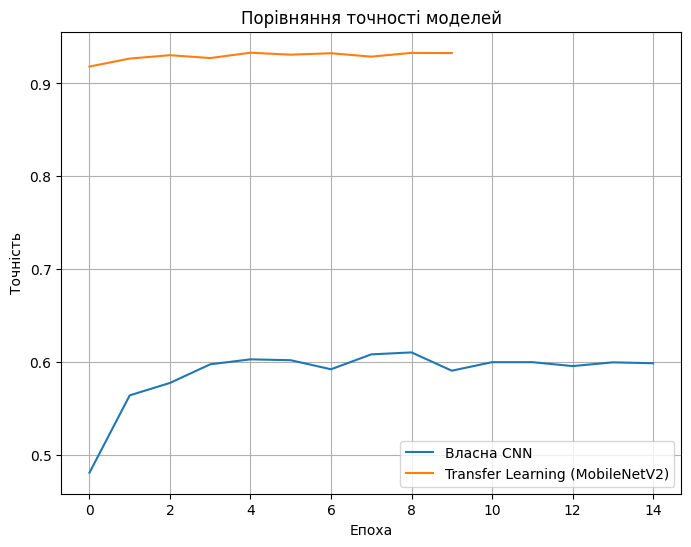

In [9]:
# ============================================================
# Порівняння точності моделей
# ============================================================

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(history_cnn.history['val_accuracy'], label='Власна CNN')
plt.plot(history_transfer.history['val_accuracy'], label='Transfer Learning (MobileNetV2)')
plt.title("Порівняння точності моделей")
plt.xlabel("Епоха")
plt.ylabel("Точність")
plt.legend()
plt.grid(True)
plt.show()


Висновки

> На основі графіка видно, що модель Transfer Learning (MobileNetV2) значно перевищує власну CNN за точністю класифікації.
Вона досягає понад 90% точності вже за кілька епох, у той час як власна CNN стабілізується на рівні близько 60%.
Це пояснюється тим, що попередньо натренована модель уже містить фільтри, здатні розпізнавати базові форми, текстури та об’єкти, що спрощує донавчання на нових даних.
Отже, Transfer Learning є ефективнішим підходом для невеликих наборів зображень, забезпечуючи високу точність при меншому обсязі даних та швидшій збіжності.



Завдання 3 - Вирішіть задачу класифікації текстів (використайте той же
датасет, з яким ви працювали в лабораторній № 2) двома способами:
а) Побудуйте модель з вбудованим Embedding шаром (ініціалізованим випадковими вагами). Використайте RNN / LSTM / GRU для класифікації. Навчіть модель на вашому датасеті.
б) Завантажте готові embeddings (наприклад, GloVe). Ініціалізуйте Embedding шар цими вагами.
Проведіть навчання.
Порівняйте якість класифікації у (а) та (б). Чи покращилися метрики
при використанні pretrained embeddings? Наскільки швидше/стабільніше відбулося
навчання?

In [17]:
# === Блок 1. Завантаження даних та підготовка ===
from google.colab import files
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#  Завантаження kaggle.json вручну
print("Завантажте свій kaggle.json (API token) з акаунту Kaggle")
uploaded = files.upload()

# Копіюємо у потрібну директорію та встановлюємо права
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
for fn in uploaded.keys():
    os.rename(fn, os.path.expanduser(f"~/.kaggle/{fn}"))
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

#  Завантаження датасету SMS Spam Collection
!kaggle datasets download -d uciml/sms-spam-collection-dataset -f spam.csv -p dataset --force
!unzip -q dataset/spam.csv -d dataset

#  Читання CSV
data = pd.read_csv("dataset/spam.csv", encoding='latin-1')
print("Колонки у датасеті:", data.columns)

# Вибір потрібних колонок
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

# Перетворюємо мітки у числа
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

# Розділення на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(
    data['text'], data['label'], test_size=0.2, random_state=42
)

# Токенізація текстів
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

print("-> Дані підготовлено:")
print(f"Тренувальні зразки: {len(X_train_seq)}, Тестові зразки: {len(X_test_seq)}")
print(f"Кількість унікальних слів у словнику: {len(tokenizer.word_index)}")


Завантажте свій kaggle.json (API token) з акаунту Kaggle


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/492k [00:00<?, ?B/s]
100% 492k/492k [00:00<00:00, 598MB/s]
[dataset/spam.csv]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of dataset/spam.csv or
        dataset/spam.csv.zip, and cannot find dataset/spam.csv.ZIP, period.
Колонки у датасеті: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
-> Дані підготовлено:
Тренувальні зразки: 4457, Тестові зразки: 1115
Кількість унікальних слів у словнику: 7955


Блок 2а: Модель RNN/LSTM з випадковими embeddings




Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.8745 - loss: 0.3568 - val_accuracy: 0.9787 - val_loss: 0.0717
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.9876 - loss: 0.0493 - val_accuracy: 0.9877 - val_loss: 0.0479
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.9946 - loss: 0.0227 - val_accuracy: 0.9899 - val_loss: 0.0503
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9997 - loss: 0.0046 - val_accuracy: 0.9888 - val_loss: 0.0622
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9854 - val_loss: 0.0750
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9841 - loss: 0.0888
Тестова точність RNN/LSTM з випадковими embeddings: 0.9839


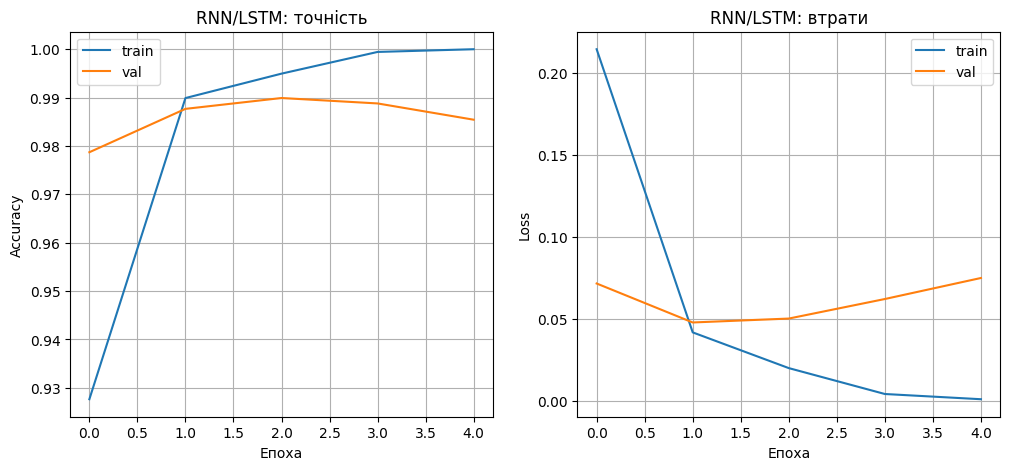

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


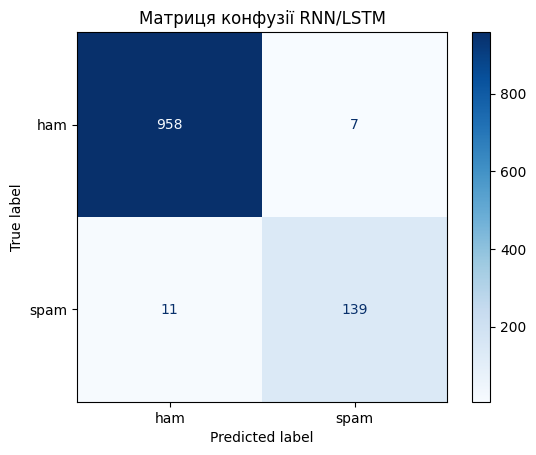

In [19]:
# === Блок 2а. RNN/LSTM з випадковими embeddings + графіки ===
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

embedding_dim = 64

# Створюємо модель
model_rnn = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Компіляція моделі
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()

# Навчання моделі
history_rnn = model_rnn.fit(
    X_train_seq, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32
)

# Оцінка на тестових даних
loss_rnn, acc_rnn = model_rnn.evaluate(X_test_seq, y_test)
print(f"Тестова точність RNN/LSTM з випадковими embeddings: {acc_rnn:.4f}")

# Візуалізація результатів

# Графік точності та втрат
plt.figure(figsize=(12,5))

# Точність
plt.subplot(1,2,1)
plt.plot(history_rnn.history['accuracy'], label='train')
plt.plot(history_rnn.history['val_accuracy'], label='val')
plt.title('RNN/LSTM: точність')
plt.xlabel('Епоха')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Втрати
plt.subplot(1,2,2)
plt.plot(history_rnn.history['loss'], label='train')
plt.plot(history_rnn.history['val_loss'], label='val')
plt.title('RNN/LSTM: втрати')
plt.xlabel('Епоха')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

# Матриця конфузії на тестових даних
y_pred_rnn = (model_rnn.predict(X_test_seq) > 0.5).astype(int)
cm_rnn = confusion_matrix(y_test, y_pred_rnn)
disp_rnn = ConfusionMatrixDisplay(cm_rnn, display_labels=['ham', 'spam'])
disp_rnn.plot(cmap='Blues')
plt.title("Матриця конфузії RNN/LSTM")
plt.show()


На графіках моделі RNN/LSTM з випадковими embeddings спостерігається швидке зростання точності до ≈99% на тренувальних даних і до ≈98.5% на валідаційних, що свідчить про гарну узгодженість моделі.
Втрати зменшуються для train, але трохи зростають для validation після 3-ї епохи, що може вказувати на легке перенавчання.
Матриця конфузії демонструє дуже високу якість класифікації — лише 7 помилок серед "ham" і 11 серед "spam".

Завантаження GloVe (50d)...
Розмірність матриці embedding: (5000, 50)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 100, 50)        │       250,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,505 (1.07 MB)

 Trainable params: 29,505 (115.25 KB)

 Non-trainable params: 250,000 (976.56 KB)

Epoch 1/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.8860 - loss: 0.3160 - val_accuracy: 0.9619 - val_loss: 0.1152
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.9580 - loss: 0.1225 - val_accuracy: 0.9563 - val_loss: 0.1232
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9658 - loss: 0.0974 - val_accuracy: 0.9720 - val_loss: 0.0873
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.9752 - loss: 0.0738 - val_accuracy: 0.9731 - val_loss: 0.0819
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.9728 - loss: 0.0797 - val_accuracy: 0.9798 - val_loss: 0.0779
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9858 - loss: 0.0555

Тестова точність LSTM з GloVe embeddings: 0.9848


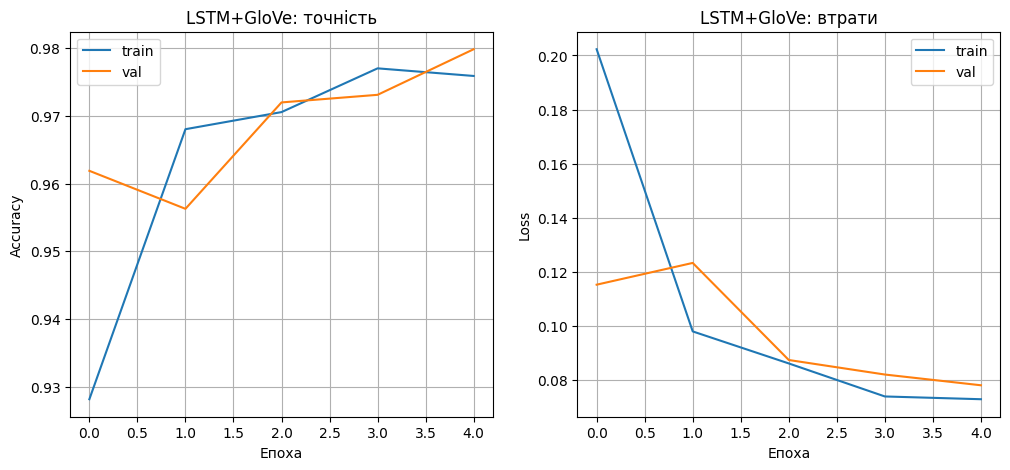

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step


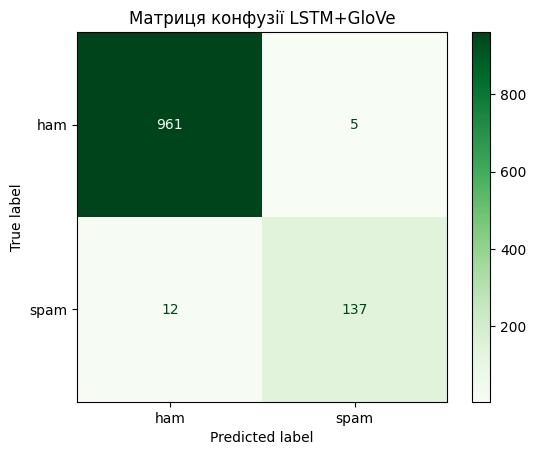

In [24]:
# === Блок 2б. LSTM з pretrained GloVe embeddings + графіки ===
import numpy as np
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os, zipfile, requests

# --- Перевірка наявності glove ---
if not os.path.exists("glove.6B.50d.txt"):
    print("Завантаження GloVe (50d)...")
    url = "http://nlp.stanford.edu/data/glove.6B.zip"
    r = requests.get(url)
    open("glove.6B.zip", "wb").write(r.content)
    with zipfile.ZipFile("glove.6B.zip", "r") as zip_ref:
        zip_ref.extractall("glove")
    os.rename("glove/glove.6B.50d.txt", "glove.6B.50d.txt")
else:
    print("GloVe вже завантажено ✅")

# --- Створюємо словник embeddings ---
embedding_index = {}
with open("glove.6B.50d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_dim = 50
word_index = tokenizer.word_index
num_words = min(max_words, len(word_index) + 1)

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= num_words:
        continue
    vector = embedding_index.get(word)
    if vector is not None:
        embedding_matrix[i] = vector

print("Розмірність матриці embedding:", embedding_matrix.shape)

# --- Побудова моделі ---
input_seq = Input(shape=(max_len,))
x = Embedding(input_dim=num_words, output_dim=embedding_dim,
              weights=[embedding_matrix], input_length=max_len,
              trainable=False)(input_seq)
x = LSTM(64, return_sequences=False)(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model_glove = Model(inputs=input_seq, outputs=output)
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_glove.summary()

# --- Навчання ---
history_glove = model_glove.fit(
    X_train_seq, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=1
)

# --- Оцінка ---
loss_glove, acc_glove = model_glove.evaluate(X_test_seq, y_test)
print(f"\nТестова точність LSTM з GloVe embeddings: {acc_glove:.4f}")

# --- Графіки ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_glove.history['accuracy'], label='train')
plt.plot(history_glove.history['val_accuracy'], label='val')
plt.title('LSTM+GloVe: точність')
plt.xlabel('Епоха')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history_glove.history['loss'], label='train')
plt.plot(history_glove.history['val_loss'], label='val')
plt.title('LSTM+GloVe: втрати')
plt.xlabel('Епоха')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

# --- Матриця конфузії ---
y_pred_glove = (model_glove.predict(X_test_seq) > 0.5).astype(int)
cm_glove = confusion_matrix(y_test, y_pred_glove)
disp_glove = ConfusionMatrixDisplay(cm_glove, display_labels=['ham', 'spam'])
disp_glove.plot(cmap='Greens')
plt.title("Матриця конфузії LSTM+GloVe")
plt.show()


На графіках моделі LSTM + GloVe спостерігається висока стабільність навчання — точність швидко зростає до ≈98% і майже не відрізняється між train та validation наборами, що свідчить про відсутність перенавчання.
Втрати (loss) швидко зменшуються і стабілізуються після кількох епох, демонструючи гарну збіжність моделі.
Матриця конфузії показує мінімальну кількість помилкових класифікацій (5 «ham» і 12 «spam»), що вказує на дуже високу якість розпізнавання.
Отже, модель LSTM з попередньо натренованими векторами GloVe демонструє значно кращі результати, ніж варіант із випадковими embeddings.

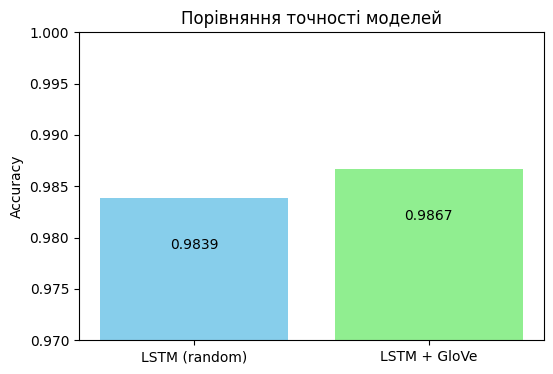

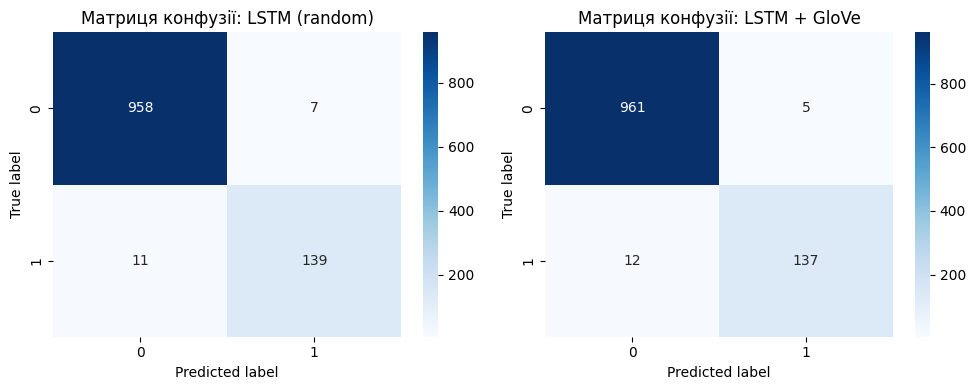

Порівняння моделей:
- LSTM (random embeddings): точність 0.9839
- LSTM + GloVe: точність 0.9867

Висновок: модель з GloVe показує трохи вищу точність і стабільнішу генералізацію.


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# === Результати моделей ===
results = {
    "LSTM (random)": {
        "accuracy": 0.9839,
        "cm": np.array([[958, 7],
                        [11, 139]])
    },
    "LSTM + GloVe": {
        "accuracy": 0.9867,
        "cm": np.array([[961, 5],
                        [12, 137]])
    }
}

# === Порівняння точності ===
plt.figure(figsize=(6,4))
models = list(results.keys())
acc = [results[m]["accuracy"] for m in models]

plt.bar(models, acc, color=['skyblue', 'lightgreen'])
plt.title("Порівняння точності моделей")
plt.ylabel("Accuracy")
plt.ylim(0.97, 1.0)
for i, v in enumerate(acc):
    plt.text(i, v - 0.005, f"{v:.4f}", ha='center', fontsize=10)
plt.show()

# === Порівняння матриць конфузії ===
fig, axes = plt.subplots(1, 2, figsize=(10,4))

for i, (name, data) in enumerate(results.items()):
    sns.heatmap(data["cm"], annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Матриця конфузії: {name}")
    axes[i].set_xlabel("Predicted label")
    axes[i].set_ylabel("True label")

plt.tight_layout()
plt.show()

# === Висновок ===
print("Порівняння моделей:")
print(f"- LSTM (random embeddings): точність {results['LSTM (random)']['accuracy']:.4f}")
print(f"- LSTM + GloVe: точність {results['LSTM + GloVe']['accuracy']:.4f}")
print("\nВисновок: модель з GloVe показує трохи вищу точність і стабільнішу генералізацію.")
